#Seaborn

documentacion: https://seaborn.pydata.org/

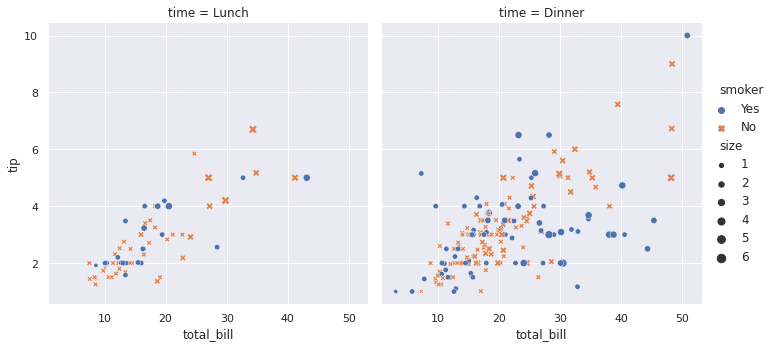

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")
# otra opcion es usar pandas.read_csv()

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

#Si no se está usando en un notebook matplotlib.pyplot.show()

Tipo de grafico

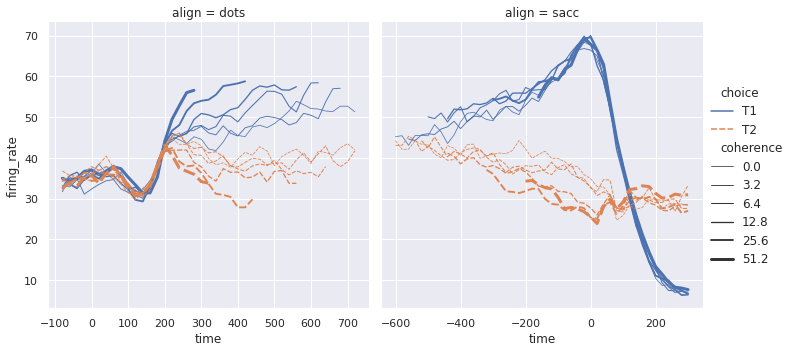

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",  #hay una columna por cada parametro align
    hue="choice", size="coherence", style="choice", #el color y el estilo de la linea cambia segun el parametro choice.
    facet_kws=dict(sharex=False), #grilla de varios graficos, sharex false-> se ajusta la escala para ver mejor el grafico.
)

Estimacion y Error

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

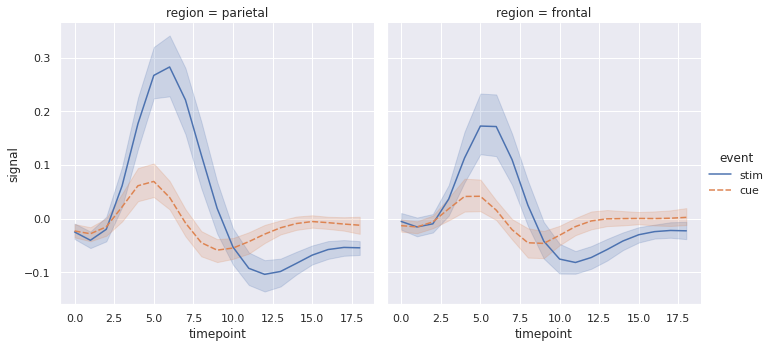

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

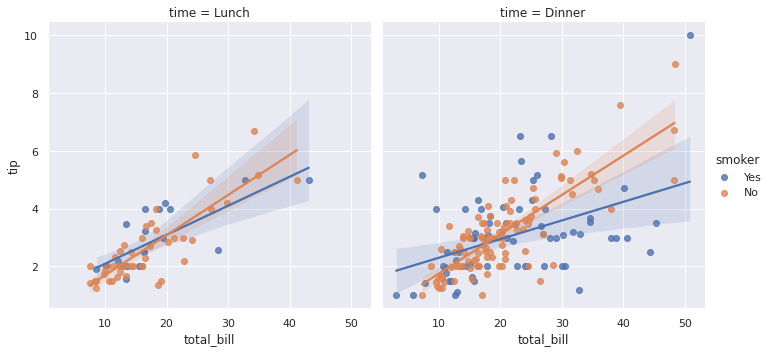

In [ ]:
# lmplot: Plot data and regression model fits across a FacetGrid. This function combines regplot() and FacetGrid.
# ** (modelo de regresion proceso estadístico para estimar las relaciones entre variables)
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Visualizacion de Distribuciones

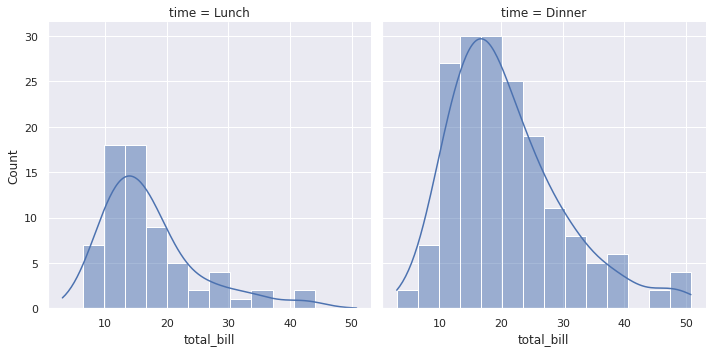

In [ ]:
#funcion displot()
sns.displot(data=tips, x="total_bill", col="time", kde=True) #kind=kde
#el tipo default es el histograma (kind="hist")
#otra opcion : kind="ecdf", empirical cumulative distribution function: distribucion acumulada

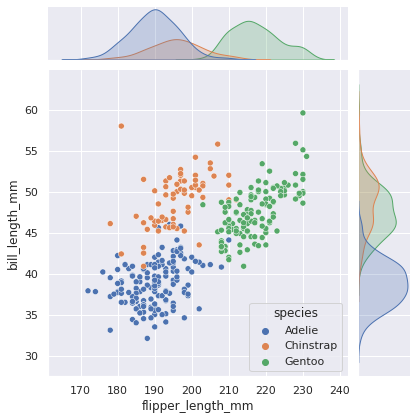

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Datos categorizados

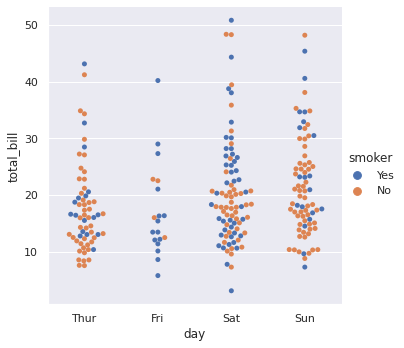

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

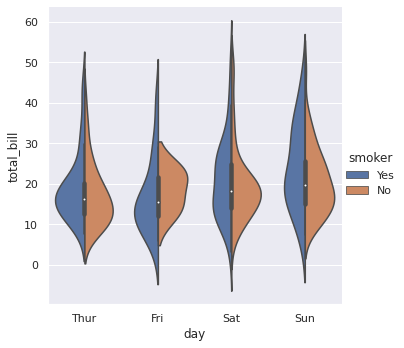

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

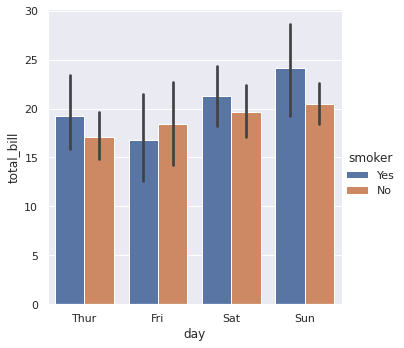

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

Customizacion

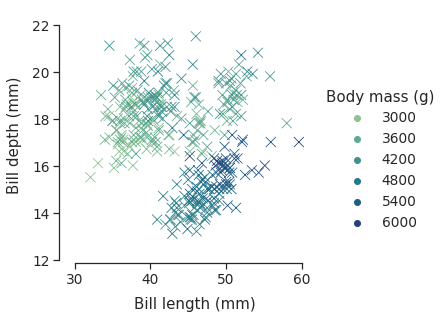

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

otro ejemplo

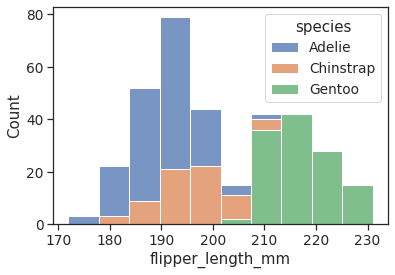

In [ ]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## Estructuras de datos aceptadas

https://seaborn.pydata.org/tutorial/data_structure.html

Seaborn supports several different dataset formats, and most functions accept data represented with objects from the pandas or numpy libraries as well as built-in Python types like lists and dictionaries.

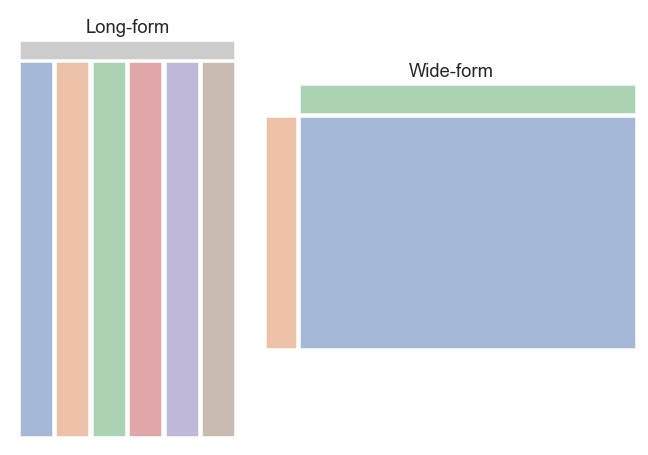

long-form data

In [5]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


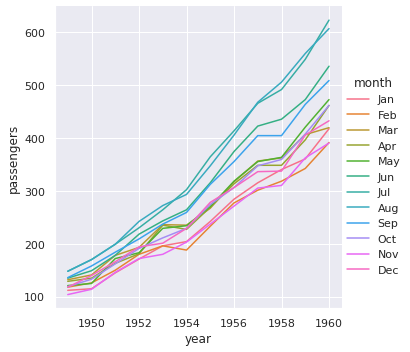

In [6]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

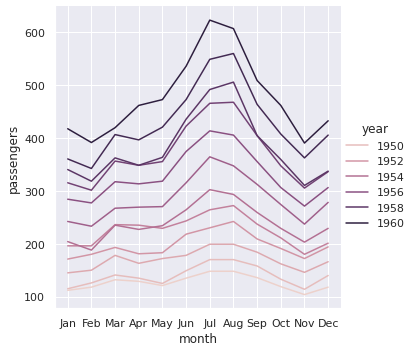

In [9]:
#Puede graficar la data de formas diferentes
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

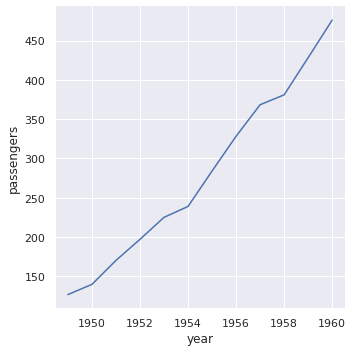

In [12]:
flights_avg = flights.groupby("year").mean()
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

Wide-form data

In [7]:
#convierto el dataset de vuelos
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


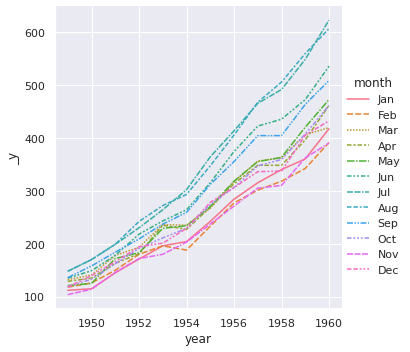

In [8]:
sns.relplot(data=flights_wide, kind="line") 
#el valor que se asigno como index es la x y el valor dentro de cada celda por cada mes(linea) es la y
#desventaja: se pierde el significado del valor de y en el grafico

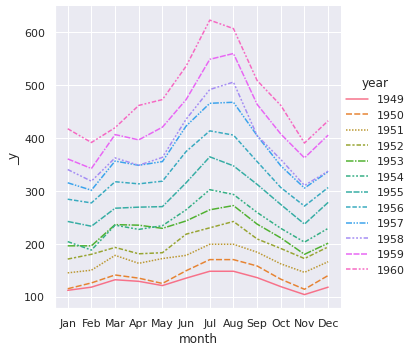

In [10]:
sns.relplot(data=flights_wide.transpose(), kind="line")

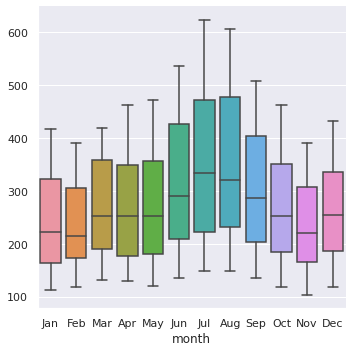

In [11]:
#los graficos dategorizadores toman como x las columnas y van agregando los valores de las filas
sns.catplot(data=flights_wide, kind="box")

Paper relevante al ordenamiento de data a long form: https://vita.had.co.nz/papers/tidy-data.pdf
